=== K-MEANS CLUSTERING ===
K-means with 4 clusters completed
Cluster centers: 
[[-2.60516878  8.99280115]
 [-6.85126211 -6.85031833]
 [ 4.68687447  2.01434593]
 [-8.83456141  7.24430734]]
K-means with custom initialization completed

=== MINI-BATCH K-MEANS ===
Mini-batch K-means completed on large dataset
Cluster centers: 
[[-8.81861894  7.35725454]
 [ 2.06663714  4.15581049]
 [-6.8913353  -6.88394158]
 [-2.47791404  9.0306803 ]
 [ 4.72083945  1.84623004]]

=== IMAGE SEGMENTATION ===
Image segmentation completed
Original image shape: (50, 50, 3)
Number of unique colors reduced from many to 8

=== SEMI-SUPERVISED LEARNING WITH CLUSTERING ===
Baseline accuracy (full labeled data): 0.9750
Pipeline accuracy (K-means + LogReg): 0.9611

Performing grid search for optimal clusters...
Best number of clusters: 90
Best cross-validation score: 0.9513

=== LABEL PROPAGATION ===
Limited labeled data accuracy (50 samples): 0.8306
Representative digits labels: [2 9 9 0 4 7 5 4 1 0 0 8 6 6 3 3 2 8 7 2

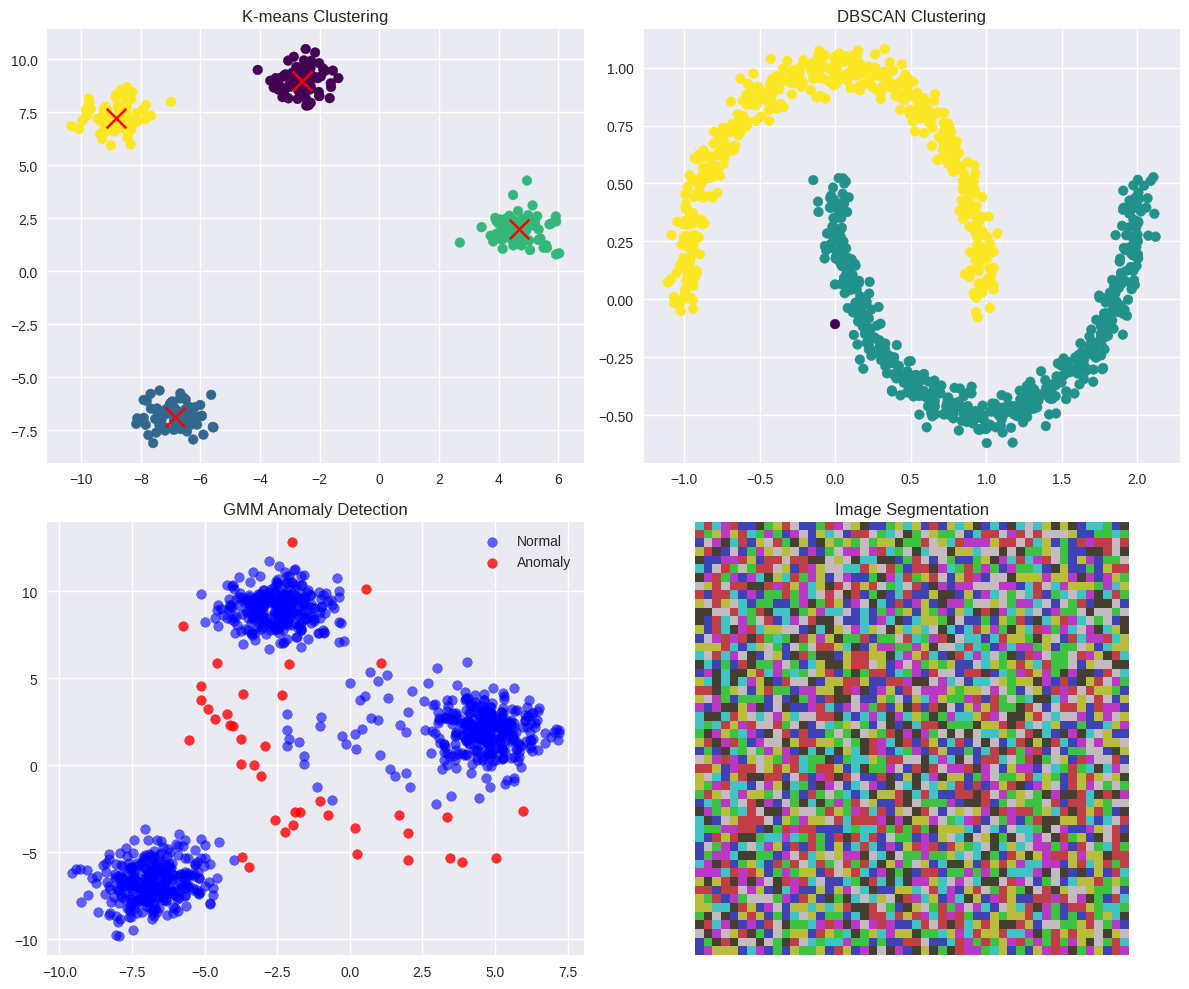

In [22]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans, MiniBatchKMeans, DBSCAN
from sklearn.mixture import GaussianMixture
from sklearn.datasets import make_blobs, make_moons, load_digits
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
import warnings
warnings.filterwarnings('ignore')

# ========================================
# 1. K-MEANS CLUSTERING
# ========================================

print("=== K-MEANS CLUSTERING ===")

# Generate sample data
X_blobs, y_blobs = make_blobs(n_samples=300, centers=4, n_features=2,
                             random_state=42, cluster_std=0.60)

# Basic K-means
k = 4
kmeans = KMeans(n_clusters=k, random_state=42)
y_pred = kmeans.fit_predict(X_blobs)

print(f"K-means with {k} clusters completed")
print(f"Cluster centers: \n{kmeans.cluster_centers_}")

# K-means with custom initialization
good_init = np.array([[-3, 3], [-3, 2], [-3, 1], [-1, 2]])  # Fixed: 4 centers for 4 clusters
kmeans_custom = KMeans(n_clusters=4, init=good_init, n_init=1, random_state=42)
y_pred_custom = kmeans_custom.fit_predict(X_blobs)

print(f"K-means with custom initialization completed")

# ========================================
# 2. MINI-BATCH K-MEANS
# ========================================

print("\n=== MINI-BATCH K-MEANS ===")

# Generate larger dataset for Mini-batch demonstration
X_large, _ = make_blobs(n_samples=10000, centers=5, n_features=2,
                       random_state=42, cluster_std=1.0)

minibatch_kmeans = MiniBatchKMeans(n_clusters=5, random_state=42)
minibatch_kmeans.fit(X_large)

print("Mini-batch K-means completed on large dataset")
print(f"Cluster centers: \n{minibatch_kmeans.cluster_centers_}")

# ========================================
# 3. IMAGE SEGMENTATION WITH K-MEANS
# ========================================

print("\n=== IMAGE SEGMENTATION ===")

# Create a simple synthetic image (RGB)
np.random.seed(42)
image = np.random.rand(50, 50, 3)  # Small image for demonstration

# Reshape image to 2D array where each row is a pixel
X_image = image.reshape(-1, 3)  # Fixed variable name

# Apply K-means for color quantization
kmeans_img = KMeans(n_clusters=8, random_state=42).fit(X_image)

# Replace each pixel with its cluster center
segmented_img = kmeans_img.cluster_centers_[kmeans_img.labels_]
segmented_img = segmented_img.reshape(image.shape)

print("Image segmentation completed")
print(f"Original image shape: {image.shape}")
print(f"Number of unique colors reduced from many to {len(kmeans_img.cluster_centers_)}")

# ========================================
# 4. CLUSTERING FOR SEMI-SUPERVISED LEARNING
# ========================================

print("\n=== SEMI-SUPERVISED LEARNING WITH CLUSTERING ===")

# Load digits dataset
X_digits, y_digits = load_digits(return_X_y=True)

# Split the data
X_train, X_test, y_train, y_test = train_test_split(
    X_digits, y_digits, test_size=0.2, random_state=42
)

# Baseline: Logistic Regression on full labeled data
log_reg_baseline = LogisticRegression(max_iter=1000, random_state=42)
log_reg_baseline.fit(X_train, y_train)
baseline_score = log_reg_baseline.score(X_test, y_test)

print(f"Baseline accuracy (full labeled data): {baseline_score:.4f}")

# Pipeline with K-means preprocessing
pipeline = Pipeline([
    ("scaler", StandardScaler()),
    ("kmeans", KMeans(n_clusters=50, random_state=42)),
    ("log_reg", LogisticRegression(max_iter=1000, random_state=42)),
])

pipeline.fit(X_train, y_train)
pipeline_score = pipeline.score(X_test, y_test)

print(f"Pipeline accuracy (K-means + LogReg): {pipeline_score:.4f}")

# Grid search for optimal number of clusters
print("\nPerforming grid search for optimal clusters...")
param_grid = dict(kmeans__n_clusters=range(10, 101, 20))  # Reduced range for faster execution
grid_clf = GridSearchCV(pipeline, param_grid, cv=3, verbose=0)
grid_clf.fit(X_train, y_train)

print(f"Best number of clusters: {grid_clf.best_params_['kmeans__n_clusters']}")
print(f"Best cross-validation score: {grid_clf.best_score_:.4f}")

# ========================================
# 5. LABEL PROPAGATION WITH CLUSTERING
# ========================================

print("\n=== LABEL PROPAGATION ===")

# Simulate limited labeled data
n_labeled = 50
log_reg_limited = LogisticRegression(max_iter=1000, random_state=42)
log_reg_limited.fit(X_train[:n_labeled], y_train[:n_labeled])
limited_score = log_reg_limited.score(X_test, y_test)

print(f"Limited labeled data accuracy ({n_labeled} samples): {limited_score:.4f}")

# Use K-means to find representative samples
k = 50
kmeans_repr = KMeans(n_clusters=k, random_state=42)
X_digits_dist = kmeans_repr.fit_transform(X_train)

# Find the closest sample to each cluster center
representative_digit_idx = np.argmin(X_digits_dist, axis=0)
X_representative_digits = X_train[representative_digit_idx]

# Manually label the representative digits (in practice, this would be done by human)
# For demonstration, we'll use the true labels
y_representative_digits = y_train[representative_digit_idx]

print(f"Representative digits labels: {y_representative_digits}")

# Propagate labels to all samples in each cluster
y_train_propagated = np.empty(len(X_train), dtype=np.int32)
for i in range(k):
    y_train_propagated[kmeans_repr.labels_ == i] = y_representative_digits[i]

# Train on propagated labels
log_reg_propagated = LogisticRegression(max_iter=1000, random_state=42)
log_reg_propagated.fit(X_train, y_train_propagated)
propagated_score = log_reg_propagated.score(X_test, y_test)

print(f"Propagated labels accuracy: {propagated_score:.4f}")

# Partial propagation (only confident samples)
percentile_closest = 20
X_cluster_dist = X_digits_dist[np.arange(len(X_train)), kmeans_repr.labels_]

# Create mask for samples to keep
partially_propagated_mask = np.ones(len(X_train), dtype=bool)

for i in range(k):
    in_cluster = (kmeans_repr.labels_ == i)
    cluster_dist = X_cluster_dist[in_cluster]
    if len(cluster_dist) > 0:
        cutoff_distance = np.percentile(cluster_dist, percentile_closest)
        above_cutoff = (X_cluster_dist > cutoff_distance)
        partially_propagated_mask[in_cluster & above_cutoff] = False

X_train_partially_propagated = X_train[partially_propagated_mask]
y_train_partially_propagated = y_train_propagated[partially_propagated_mask]

# Train on partially propagated data
log_reg_partial = LogisticRegression(max_iter=1000, random_state=42)
log_reg_partial.fit(X_train_partially_propagated, y_train_partially_propagated)
partial_score = log_reg_partial.score(X_test, y_test)

print(f"Partial propagation accuracy: {partial_score:.4f}")
print(f"Samples used: {len(X_train_partially_propagated)}/{len(X_train)}")

# ========================================
# 6. DBSCAN CLUSTERING
# ========================================

print("\n=== DBSCAN CLUSTERING ===")

# Generate moon-shaped data
X_moons, y_moons = make_moons(n_samples=1000, noise=0.05, random_state=42)

# Apply DBSCAN
dbscan = DBSCAN(eps=0.1, min_samples=5)  # Adjusted eps for better results
dbscan.fit(X_moons)

# Count clusters and noise points
n_clusters = len(set(dbscan.labels_)) - (1 if -1 in dbscan.labels_ else 0)
n_noise = list(dbscan.labels_).count(-1)

print(f"Number of clusters: {n_clusters}")
print(f"Number of noise points: {n_noise}")

# Classification based on DBSCAN core samples
if hasattr(dbscan, 'components_') and len(dbscan.components_) > 0:
    knn = KNeighborsClassifier(n_neighbors=10)  # Reduced neighbors
    knn.fit(dbscan.components_, dbscan.labels_[dbscan.core_sample_indices_])
    print("KNN classifier trained on DBSCAN core samples")
else:
    print("No core samples found in DBSCAN")

# ========================================
# 7. GAUSSIAN MIXTURE MODEL FOR ANOMALY DETECTION
# ========================================

print("\n=== GAUSSIAN MIXTURE MODEL - ANOMALY DETECTION ===")

# Generate data with outliers
X_normal, _ = make_blobs(n_samples=900, centers=3, n_features=2,
                        random_state=42, cluster_std=1.0)
X_outliers = np.random.uniform(low=-6, high=6, size=(100, 2))
X_combined = np.vstack([X_normal, X_outliers])

# Fit Gaussian Mixture Model
gm = GaussianMixture(n_components=3, n_init=10, random_state=42)
gm.fit(X_combined)

# Calculate densities and detect anomalies
densities = gm.score_samples(X_combined)
density_threshold = np.percentile(densities, 4)  # Bottom 4% as anomalies
anomalies = X_combined[densities < density_threshold]

print(f"Total samples: {len(X_combined)}")
print(f"Detected anomalies: {len(anomalies)}")
print(f"Anomaly rate: {len(anomalies)/len(X_combined):.2%}")

# ========================================
# 8. RESULTS SUMMARY
# ========================================

print("\n" + "="*50)
print("RESULTS SUMMARY")
print("="*50)
print(f"1. Baseline (full labeled): {baseline_score:.4f}")
print(f"2. K-means pipeline: {pipeline_score:.4f}")
print(f"3. Limited labeled ({n_labeled} samples): {limited_score:.4f}")
print(f"4. Label propagation: {propagated_score:.4f}")
print(f"5. Partial propagation: {partial_score:.4f}")
print(f"6. DBSCAN clusters found: {n_clusters}")
print(f"7. GMM anomaly detection: {len(anomalies)} anomalies detected")

print("\n=== ALL MODELS COMPLETED SUCCESSFULLY ===")

# Optional: Create simple visualizations
def plot_clustering_results():
    """Create visualizations for clustering results"""
    fig, axes = plt.subplots(2, 2, figsize=(12, 10))

    # K-means on blobs
    axes[0, 0].scatter(X_blobs[:, 0], X_blobs[:, 1], c=y_pred, cmap='viridis')
    axes[0, 0].scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1],
                      c='red', marker='x', s=200)
    axes[0, 0].set_title('K-means Clustering')

    # DBSCAN on moons
    axes[0, 1].scatter(X_moons[:, 0], X_moons[:, 1], c=dbscan.labels_, cmap='viridis')
    axes[0, 1].set_title('DBSCAN Clustering')

    # GMM anomaly detection
    normal_mask = densities >= density_threshold
    axes[1, 0].scatter(X_combined[normal_mask, 0], X_combined[normal_mask, 1],
                      c='blue', alpha=0.6, label='Normal')
    axes[1, 0].scatter(X_combined[~normal_mask, 0], X_combined[~normal_mask, 1],
                      c='red', alpha=0.8, label='Anomaly')
    axes[1, 0].set_title('GMM Anomaly Detection')
    axes[1, 0].legend()

    # Image segmentation result
    axes[1, 1].imshow(segmented_img)
    axes[1, 1].set_title('Image Segmentation')
    axes[1, 1].axis('off')

    plt.tight_layout()
    plt.show()

# Uncomment the line below to show plots
plot_clustering_results()